# 로지스틱 회귀 학습 실습

이 노트북에서는 로지스틱 회귀의 그래디언트 계산과 가중치 갱신 과정을 단계별로 살펴봅니다.

## 사용할 수식

**활성화 함수:** $\sigma(z) \in (0, 1)$ (Sigmoid 함수)

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**손실 함수:** Binary Cross-Entropy

$$J = -\sum_{k=1}^{N} \Big[ y_k \ln \hat{y}_k + (1 - y_k) \ln(1 - \hat{y}_k) \Big]$$

**그래디언트:**

$$\frac{\partial J}{\partial w_i} = \sum_{k=1}^{N} (\sigma(z_k) - y_k) \, x_{ki}$$

**가중치 갱신:**

$$\mathbf{w} \leftarrow \mathbf{w} - \rho \, \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y})$$

---
## Step 0: 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 설정
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.unicode_minus'] = False

---
## Step 1: 데이터 준비

5개의 샘플을 준비합니다. $x_0 = 1$은 bias term입니다.

| $k$ | $x_0$ | $x_1$ | $x_2$ | $y$ |
|:---:|:---:|:---:|:---:|:---:|
| 1 | 1 | 0 | 0 | 0 |
| 2 | 1 | 0 | 1 | 0 |
| 3 | 1 | 4 | 4 | 1 |
| 4 | 1 | 1 | 2 | 0 |
| 5 | 1 | 2 | 1 | 0 |

In [2]:
# 입력 데이터 (x0=1은 bias term)
X = np.array([
    [1, 0, 0],  # x1
    [1, 0, 1],  # x2
    [1, 4, 4],  # x3
    [1, 1, 2],  # x4
    [1, 2, 1],  # x5
])

# 레이블 (0 또는 1)
y = np.array([0, 0, 1, 0, 0])

print("입력 데이터 X:")
print(X)
print("\n레이블 y:", y)

입력 데이터 X:
[[1 0 0]
 [1 0 1]
 [1 4 4]
 [1 1 2]
 [1 2 1]]

레이블 y: [0 0 1 0 0]


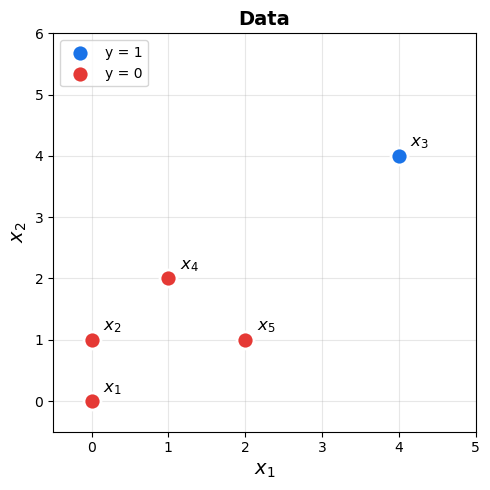

In [3]:
def plot_data(ax, X, y, title):
    """데이터 시각화"""
    pos_idx = y == 1
    neg_idx = y == 0
    
    ax.scatter(X[pos_idx, 1], X[pos_idx, 2], c='#1a73e8', s=150,
               marker='o', label='y = 1', edgecolors='white', linewidths=2, zorder=5)
    ax.scatter(X[neg_idx, 1], X[neg_idx, 2], c='#e53935', s=150,
               marker='o', label='y = 0', edgecolors='white', linewidths=2, zorder=5)
    
    for k in range(len(X)):
        ax.annotate(f'$x_{k+1}$', (X[k,1]+0.15, X[k,2]+0.15), fontsize=12, fontweight='bold')
    
    ax.set_xlim(-0.5, 5)
    ax.set_ylim(-0.5, 6)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3)
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
ax = plot_data(ax, X, y, 'Data')
plt.tight_layout()
plt.show()

---
## Step 2: 초기 가중치 설정

$$\mathbf{w} = (w_0, w_1, w_2) = (-25, 10, 10)$$

In [4]:
# 초기 가중치
w = np.array([-25, 10, 10], dtype=float)

# 학습률
rho = 1.0

print(f"초기 가중치 w = {w}")
print(f"학습률 ρ = {rho}")

초기 가중치 w = [-25.  10.  10.]
학습률 ρ = 1.0


---
## Step 3: 활성화 함수 정의

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

In [5]:
def sigma(z):
    """Sigmoid 함수: 출력값이 (0, 1) 사이"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

# 테스트
test_z = np.array([-10, -1, 0, 1, 10])
print(f"z = {test_z}")
print(f"σ(z) = {np.round(sigma(test_z), 4)}")

z = [-10  -1   0   1  10]
σ(z) = [0.     0.2689 0.5    0.7311 1.    ]


---
## Step 4: 현재 가중치로 분류해보기

$$z_k = \mathbf{w}^T \mathbf{x}_k \quad (k = 1, 2, \cdots, N)$$

행렬 형태로는:

$$\mathbf{z} = \mathbf{X} \mathbf{w}$$

In [6]:
# z = Xw 계산
z = X @ w

print("각 샘플의 z값 계산:")
print("=" * 50)
for k in range(len(X)):
    z_k = w[0]*X[k,0] + w[1]*X[k,1] + w[2]*X[k,2]
    print(f"z_{k+1} = ({w[0]})·{X[k,0]} + ({w[1]})·{X[k,1]} + ({w[2]})·{X[k,2]} = {z_k}")

print("\n행렬 계산 결과:")
print(f"z = Xw = {z}")

각 샘플의 z값 계산:
z_1 = (-25.0)·1 + (10.0)·0 + (10.0)·0 = -25.0
z_2 = (-25.0)·1 + (10.0)·0 + (10.0)·1 = -15.0
z_3 = (-25.0)·1 + (10.0)·4 + (10.0)·4 = 55.0
z_4 = (-25.0)·1 + (10.0)·1 + (10.0)·2 = 5.0
z_5 = (-25.0)·1 + (10.0)·2 + (10.0)·1 = 5.0

행렬 계산 결과:
z = Xw = [-25. -15.  55.   5.   5.]


---
## Step 5: 예측값과 오분류 확인

$$\hat{y}_k = \sigma(z_k)$$

오차 (연속값):

$$e_k = \sigma(z_k) - y_k$$

In [7]:
# 예측값
y_hat = sigma(z)
y_pred = (y_hat >= 0.5).astype(int)

# 오차
error = y_hat - y

print("분류 결과:")
print("=" * 70)
print(f"{'k':<4} {'z_k':<8} {'σ(z_k)':<10} {'pred':<6} {'y_k':<6} {'σ(z)-y':<10} {'오분류?'}")
print("-" * 70)
for k in range(len(X)):
    misclass = "✓ 오분류" if y_pred[k] != y[k] else ""
    print(f"{k+1:<4} {z[k]:<8.0f} {y_hat[k]:<10.4f} {y_pred[k]:<6} {y[k]:<6} {error[k]:<+10.4f} {misclass}")
print("=" * 70)
print(f"\n오분류 샘플 수: {np.sum(y_pred != y)}개")

분류 결과:
k    z_k      σ(z_k)     pred   y_k    σ(z)-y     오분류?
----------------------------------------------------------------------
1    -25      0.0000     0      0      +0.0000    
2    -15      0.0000     0      0      +0.0000    
3    55       1.0000     1      1      +0.0000    
4    5        0.9933     1      0      +0.9933    ✓ 오분류
5    5        0.9933     1      0      +0.9933    ✓ 오분류

오분류 샘플 수: 2개


---
## Step 6: 그래디언트 계산

**스칼라 형태:**

$$\frac{\partial J}{\partial w_i} = \sum_{k=1}^{N} (\sigma(z_k) - y_k) \, x_{ki}$$

**행렬 형태:**

$$\nabla J = \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y})$$

In [8]:
# 각 샘플의 기여 계산
print("각 샘플의 그래디언트 기여:")
print("=" * 70)
print(f"{'k':<4} {'σ(z)-y':<10} {'x_k':<20} {'(σ(z)-y)·x_k'}")
print("-" * 70)

for k in range(len(X)):
    contribution = error[k] * X[k]
    print(f"{k+1:<4} {error[k]:<+10.4f} {str(X[k]):<20} {contribution}")

print("=" * 70)

# 행렬 계산으로 그래디언트
gradient = X.T @ error
print(f"\n그래디언트 (행렬 계산):")
print(f"∇J = Xᵀ(σ(z) - y) = {gradient}")

각 샘플의 그래디언트 기여:
k    σ(z)-y     x_k                  (σ(z)-y)·x_k
----------------------------------------------------------------------
1    +0.0000    [1 0 0]              [1.38879439e-11 0.00000000e+00 0.00000000e+00]
2    +0.0000    [1 0 1]              [3.05902227e-07 0.00000000e+00 3.05902227e-07]
3    +0.0000    [1 4 4]              [0. 0. 0.]
4    +0.9933    [1 1 2]              [0.99330715 0.99330715 1.9866143 ]
5    +0.9933    [1 2 1]              [0.99330715 1.9866143  0.99330715]

그래디언트 (행렬 계산):
∇J = Xᵀ(σ(z) - y) = [1.9866146  2.97992145 2.97992175]


---
## Step 7: 가중치 갱신

$$\mathbf{w}' = \mathbf{w} - \rho \cdot \nabla J = \mathbf{w} - \rho \cdot \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y})$$

In [9]:
# 가중치 갱신
w_new = w - rho * gradient

print("가중치 갱신:")
print("=" * 50)
print(f"w      = {w}")
print(f"∇J     = {gradient}")
print(f"ρ·∇J   = {rho * gradient}")
print("-" * 50)
print(f"w' = w - ρ·∇J = {w_new}")

가중치 갱신:
w      = [-25.  10.  10.]
∇J     = [1.9866146  2.97992145 2.97992175]
ρ·∇J   = [1.9866146  2.97992145 2.97992175]
--------------------------------------------------
w' = w - ρ·∇J = [-26.9866146    7.02007855   7.02007825]


---
## Step 8: 갱신 후 재분류 (검증)

새로운 가중치로 다시 분류해서 오분류가 해결되었는지 확인합니다.

In [10]:
# 새 가중치로 재계산
z_new = X @ w_new
y_hat_new = sigma(z_new)
y_pred_new = (y_hat_new >= 0.5).astype(int)

print("갱신 후 분류 결과:")
print("=" * 70)
print(f"{'k':<4} {'z_k':<8} {'σ(z_k)':<10} {'pred':<6} {'y_k':<6} {'결과'}")
print("-" * 70)
for k in range(len(X)):
    status = "✓ 정분류" if y_pred_new[k] == y[k] else "✗ 오분류"
    print(f"{k+1:<4} {z_new[k]:<8.2f} {y_hat_new[k]:<10.4f} {y_pred_new[k]:<6} {y[k]:<6} {status}")
print("=" * 70)
print(f"\n오분류 샘플 수: {np.sum(y_pred_new != y)}개")

if np.sum(y_pred_new != y) == 0:
    print("\n🎉 모든 샘플이 정분류되었습니다!")

갱신 후 분류 결과:
k    z_k      σ(z_k)     pred   y_k    결과
----------------------------------------------------------------------
1    -26.99   0.0000     0      0      ✓ 정분류
2    -19.97   0.0000     0      0      ✓ 정분류
3    29.17    1.0000     1      1      ✓ 정분류
4    -5.93    0.0027     0      0      ✓ 정분류
5    -5.93    0.0027     0      0      ✓ 정분류

오분류 샘플 수: 0개

🎉 모든 샘플이 정분류되었습니다!


---
## Step 9: 결정경계 시각화

결정경계 수식:

$$w_0 + w_1 x_1 + w_2 x_2 = 0 \quad \Rightarrow \quad x_2 = -\frac{w_0 + w_1 x_1}{w_2}$$

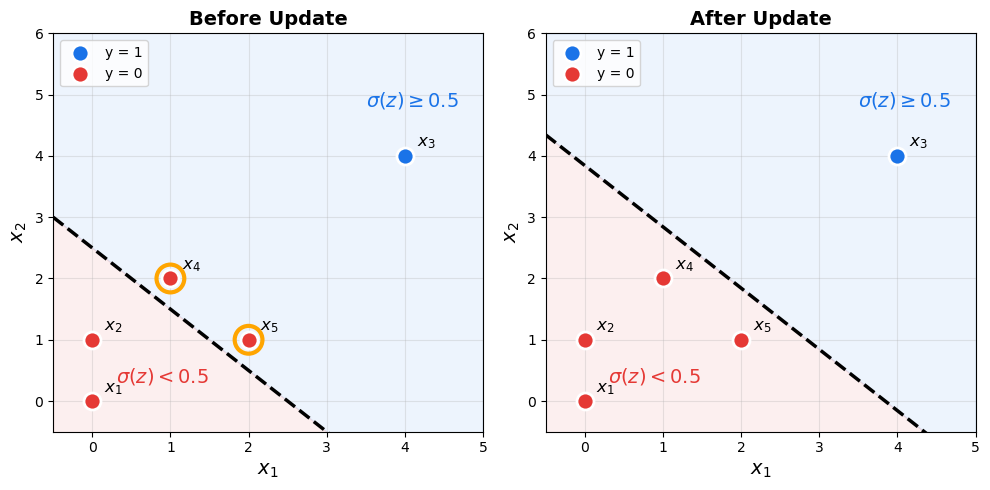

In [11]:
def decision_boundary(w, x1_range):
    """결정경계 x2 계산"""
    return -(w[0] + w[1] * x1_range) / w[2]

def plot_logistic(ax, w_plot, X, y, title, show_misclassified=True):
    """로지스틱 회귀 시각화"""
    ax = plot_data(ax, X, y, title)
    
    x1_range = np.linspace(-0.5, 5, 100)
    x2_bd = decision_boundary(w_plot, x1_range)
    ax.plot(x1_range, x2_bd, 'k--', linewidth=2.5, label='Decision Boundary')
    ax.fill_between(x1_range, x2_bd, 6, alpha=0.08, color='#1a73e8')
    ax.fill_between(x1_range, -1, x2_bd, alpha=0.08, color='#e53935')
    
    ax.text(3.5, 4.8, r'$\sigma(z) \geq 0.5$', fontsize=14, color='#1a73e8', fontweight='bold')
    ax.text(0.3, 0.3, r'$\sigma(z) < 0.5$', fontsize=14, color='#e53935', fontweight='bold')
    
    if show_misclassified:
        z_plot = X @ w_plot
        pred_plot = (sigma(z_plot) >= 0.5).astype(int)
        for k in range(len(X)):
            if pred_plot[k] != y[k]:
                ax.scatter(X[k,1], X[k,2], s=400, facecolors='none',
                           edgecolors='orange', linewidths=3, zorder=4, label='Misclassified')

# 비교 그래프
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_logistic(axes[0], w, X, y, 'Before Update', show_misclassified=True)
plot_logistic(axes[1], w_new, X, y, 'After Update', show_misclassified=False)

plt.tight_layout()
plt.show()

---
## Step 10: 확률 등고선 — 로지스틱 회귀의 진짜 출력

퍼셉트론은 0 또는 1만 출력하지만, 로지스틱 회귀는 **확률** $P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^T\mathbf{x})$를 출력합니다.  
결정경계($\sigma = 0.5$) 주변의 확률 분포를 등고선으로 확인해봅니다.

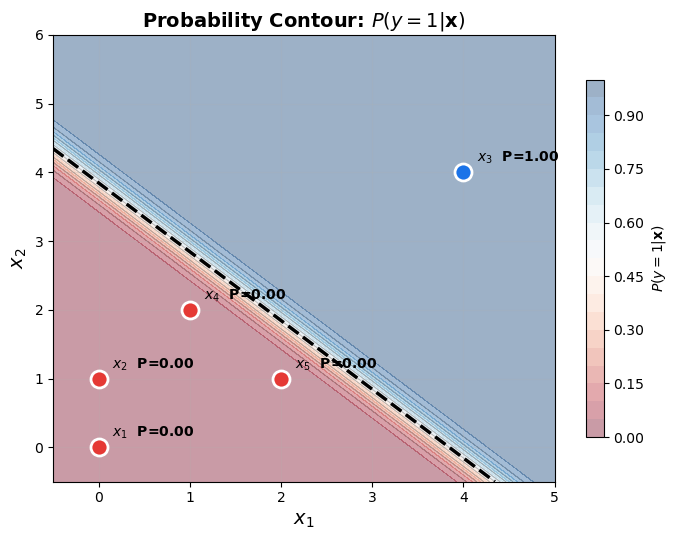

In [12]:
fig, ax = plt.subplots(figsize=(7, 5.5))

# 확률 등고선
x1_grid = np.linspace(-0.5, 5, 200)
x2_grid = np.linspace(-0.5, 6, 200)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
Z = sigma(w_new[0] + w_new[1] * X1 + w_new[2] * X2)

levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cs = ax.contourf(X1, X2, Z, levels=20, cmap='RdBu', alpha=0.4)
ax.contour(X1, X2, Z, levels=levels, colors='gray', linewidths=0.8, alpha=0.5)
ax.contour(X1, X2, Z, levels=[0.5], colors='black', linewidths=2.5, linestyles='--')
plt.colorbar(cs, ax=ax, label='$P(y=1 | \mathbf{x})$', shrink=0.8)

# 데이터 + 확률 표시
for k in range(len(X)):
    c = '#1a73e8' if y[k] == 1 else '#e53935'
    prob = sigma(X[k] @ w_new)
    ax.scatter(X[k,1], X[k,2], c=c, s=150, edgecolors='white', linewidths=2, zorder=5)
    ax.annotate(f'$x_{k+1}$  P={prob:.2f}', (X[k,1]+0.15, X[k,2]+0.15),
                fontsize=10, fontweight='bold')

ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 6)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('Probability Contour: $P(y=1 | \mathbf{x})$', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

---
## 전체 과정 요약

| 단계 | 수식 | 결과 |
|:---|:---|:---|
| 초기 가중치 | $\mathbf{w} = (-25, 10, 10)$ | |
| z 계산 | $\mathbf{z} = \mathbf{X}\mathbf{w}$ | $(-25, -15, +55, +5, +5)$ |
| 예측 | $\hat{\mathbf{y}} = \sigma(\mathbf{z})$ | $(0.00, 0.00, 1.00, 0.99, 0.99)$ |
| 오차 | $\mathbf{e} = \hat{\mathbf{y}} - \mathbf{y}$ | $(0.00, 0.00, 0.00, +0.99, +0.99)$ |
| 그래디언트 | $\nabla J = \mathbf{X}^T \mathbf{e}$ | $(+1.99, +2.98, +2.98)$ |
| 갱신 | $\mathbf{w}' = \mathbf{w} - \rho \nabla J$ | $(-27.0, 7.0, 7.0)$ |
| 결과 | 오분류 수 | $2 \rightarrow 0$ ✓ |

---
## 연습 문제

아래 셀에서 초기 가중치나 데이터를 변경해보고, 학습 과정이 어떻게 달라지는지 확인해보세요.

In [13]:
# 여기에 코드를 작성하세요
# 예: w_test = np.array([-30, 5, 5])